<a href="https://colab.research.google.com/github/JohnOliver23/DatasetsML/blob/master/projeto_topicos_checkpoints.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn import metrics 
import pandas as pd
from sklearn import tree
from sklearn import preprocessing
from IPython.display import Markdown as md
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
 


In [0]:
def run_algorithms(X_train, X_test, y_train, y_test, n_classes):

# Creating result vars 
  results = {
      'tree': 0,
      'knn5': 0,
      'knn10': 0,
      'mlp1': 0,
      'mlp2': 0,
      'kmeans': 0
  } 

  curves = {
      'mlp1':'',
      'mlp2':''
  }

  #Tree
  dtc = DecisionTreeClassifier()
  dtc = dtc.fit(X_train, y_train)
  test_result = dtc.predict(X_test)

  #Taxa de acertos  three
  results['tree']    =  metrics.accuracy_score(y_test, test_result) * 100

  # KNN n=5 
  knn5= KNeighborsClassifier(n_neighbors=5)
  knn5.fit(X_train, y_train)
  test_result = knn5.predict(X_test)

  #Taxa de acertos Knn5
  results['knn5'] = metrics.accuracy_score(y_test, test_result) * 100

  # KNN n=10 
  knn10 = KNeighborsClassifier(n_neighbors=10)
  knn10.fit(X_train, y_train)
  test_result = knn10.predict(X_test)

  #Taxa de acertos Knn10
  results['knn10'] = metrics.accuracy_score(y_test, test_result) * 100

  # MLP1 
  mlp1 = MLPClassifier(hidden_layer_sizes=(10,8), max_iter=500, alpha=0.0001,
                        verbose=10,  random_state=21,tol=0.000000001)
  #mlp1 = MLPClassifier(hidden_layer_sizes=(10,8))
  mlp1.fit(X_train, y_train )
  test_result = mlp1.predict(X_test)

  results['mlp1'] = metrics.accuracy_score(y_test, test_result) * 100
  curves['mlp1'] = mlp1.loss_curve_

  # MLP2 
  mlp2 = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=500, alpha=0.0001,
                        verbose=10,  random_state=21,tol=0.000000001)
  #mlp2 = MLPClassifier(hidden_layer_sizes=(10, 5))
  mlp2.fit(X_train, y_train)
  test_result = mlp2.predict(X_test)

  curves['mlp2'] = mlp2.loss_curve_
  results['mlp2'] = metrics.accuracy_score(y_test, test_result) * 100

  # Kmeans
  km = KMeans(n_clusters=n_classes)
  km.fit(X_train, y_train)
  test_result = km.predict(X_test)


  results['kmeans'] = metrics.accuracy_score(y_test, test_result) * 100

  report = {
      'results': results,
      'curves': curves
  }

  return report

  
  


In [45]:
# =========== Hayes-Roth =============
url_roth = "https://raw.githubusercontent.com/JohnOliver23/DatasetsML/master/database/hayes-roth.data"
col_names_roth = ['name', 'x1', 'x2', 'x3', 'x4', 'label']
feature_cols_roth = ['x1', 'x2', 'x3', 'x4']

raw_dataset_roth = pd.read_csv( url_roth , header=None, names=col_names_roth)

x = raw_dataset_roth[feature_cols_roth]
y = raw_dataset_roth.label

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=None, stratify=y)

report_roth = run_algorithms(X_train, X_test, y_train, y_test,3)

#Kmeans graphic
x = raw_dataset_roth.iloc[:, [1,2,3,4]].values
kmeans = KMeans(n_clusters=3)#muda de acordo com as classes
y_kmeans = kmeans.fit_predict(x)

kmeans.cluster_centers_

ErrorRothKm =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    ErrorRothKm.append(kmeans.inertia_)


print(report_roth['results'])

Iteration 1, loss = 1.42585942
Iteration 2, loss = 1.41422034
Iteration 3, loss = 1.40295560
Iteration 4, loss = 1.39207830
Iteration 5, loss = 1.38158186
Iteration 6, loss = 1.37150515
Iteration 7, loss = 1.36172759
Iteration 8, loss = 1.35221729
Iteration 9, loss = 1.34302790
Iteration 10, loss = 1.33416924
Iteration 11, loss = 1.32567125
Iteration 12, loss = 1.31746841
Iteration 13, loss = 1.30959096
Iteration 14, loss = 1.30202597
Iteration 15, loss = 1.29475295
Iteration 16, loss = 1.28768942
Iteration 17, loss = 1.28099743
Iteration 18, loss = 1.27462603
Iteration 19, loss = 1.26855868
Iteration 20, loss = 1.26284844
Iteration 21, loss = 1.25751283
Iteration 22, loss = 1.25244997
Iteration 23, loss = 1.24758222
Iteration 24, loss = 1.24293185
Iteration 25, loss = 1.23848123
Iteration 26, loss = 1.23422915
Iteration 27, loss = 1.23019058
Iteration 28, loss = 1.22632833
Iteration 29, loss = 1.22262092
Iteration 30, loss = 1.21905267
Iteration 31, loss = 1.21557937
Iteration 32, los

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 85, loss = 1.06529726
Iteration 86, loss = 1.06436925
Iteration 87, loss = 1.06342937
Iteration 88, loss = 1.06251440
Iteration 89, loss = 1.06158609
Iteration 90, loss = 1.06067326
Iteration 91, loss = 1.05977392
Iteration 92, loss = 1.05887550
Iteration 93, loss = 1.05797786
Iteration 94, loss = 1.05708191
Iteration 95, loss = 1.05623604
Iteration 96, loss = 1.05544913
Iteration 97, loss = 1.05467058
Iteration 98, loss = 1.05393482
Iteration 99, loss = 1.05320257
Iteration 100, loss = 1.05248714
Iteration 101, loss = 1.05177022
Iteration 102, loss = 1.05105608
Iteration 103, loss = 1.05033038
Iteration 104, loss = 1.04958745
Iteration 105, loss = 1.04887971
Iteration 106, loss = 1.04822349
Iteration 107, loss = 1.04756577
Iteration 108, loss = 1.04693616
Iteration 109, loss = 1.04638644
Iteration 110, loss = 1.04586014
Iteration 111, loss = 1.04532915
Iteration 112, loss = 1.04480570
Iteration 113, loss = 1.04428563
Iteration 114, loss = 1.04376293
Iteration 115, loss = 1.0

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


{'tree': 81.48148148148148, 'knn5': 51.85185185185185, 'knn10': 59.25925925925925, 'mlp1': 55.55555555555556, 'mlp2': 55.55555555555556, 'kmeans': 37.03703703703704}


In [46]:
# =========== WINE =============
url_wine = "https://raw.githubusercontent.com/marlonfernando16/machinelearning/master/database/wine.data"
col_names_wine = ['label', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13']
feature_cols_wine = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13']

raw_dataset_wine = pd.read_csv( url_wine , header=None, names=col_names_wine)

x = raw_dataset_wine[feature_cols_wine]
y = raw_dataset_wine.label

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=None, stratify=y)

report_wine = tasks_ml(X_train, X_test, y_train, y_test,3)

#kmeansGraphic
x = raw_dataset_wine.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12,13]].values
kmeans = KMeans(n_clusters=3)#muda de acordo com as classes
y_kmeans = kmeans.fit_predict(x)

kmeans.cluster_centers_

ErrorWineKm =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    ErrorWineKm.append(kmeans.inertia_)

print(report_wine['results'])

Iteration 1, loss = 246.50893269
Iteration 2, loss = 243.34104669
Iteration 3, loss = 240.19441798
Iteration 4, loss = 237.06872957
Iteration 5, loss = 233.96414013
Iteration 6, loss = 230.88081733
Iteration 7, loss = 227.81898423
Iteration 8, loss = 224.77883515
Iteration 9, loss = 221.76053581
Iteration 10, loss = 218.76422285
Iteration 11, loss = 215.79000212
Iteration 12, loss = 212.83794631
Iteration 13, loss = 209.90809279
Iteration 14, loss = 207.00044199
Iteration 15, loss = 204.11495620
Iteration 16, loss = 201.25155906
Iteration 17, loss = 198.41013538
Iteration 18, loss = 195.59053103
Iteration 19, loss = 192.79255269
Iteration 20, loss = 190.01596693
Iteration 21, loss = 187.26049893
Iteration 22, loss = 184.52583081
Iteration 23, loss = 181.81159985
Iteration 24, loss = 179.11739696
Iteration 25, loss = 176.44276535
Iteration 26, loss = 173.78719968
Iteration 27, loss = 171.15014570
Iteration 28, loss = 168.53100047
Iteration 29, loss = 165.92911326
Iteration 30, loss = 16

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


{'tree': 77.77777777777779, 'knn5': 50.0, 'knn10': 52.77777777777778, 'mlp1': 52.77777777777778, 'mlp2': 58.333333333333336, 'kmeans': 16.666666666666664}


In [47]:
# =========== IRIS =============
url_iris = "https://raw.githubusercontent.com/marlonfernando16/machinelearning/master/database/iris.data"
col_names_iris = ['label', 'x1', 'x2', 'x3', 'x4']
feature_cols_iris = ['x1', 'x2', 'x3', 'x4']

raw_dataset_iris = pd.read_csv( url_iris , header=None, names=col_names_iris)

x = raw_dataset_iris[feature_cols_iris]
y = raw_dataset_iris.label

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=None, stratify=y)

report_iris = run_algorithms(X_train, X_test, y_train, y_test,3)

#kmeansGraphic
x = raw_dataset_iris.iloc[:, [1,2,3,4]].values
kmeans = KMeans(n_clusters=3)#muda de acordo com as classes
y_kmeans = kmeans.fit_predict(x)

kmeans.cluster_centers_

ErrorIrisKm =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    ErrorIrisKm.append(kmeans.inertia_)

print(report_iris['results'])



Iteration 1, loss = 1.23496396
Iteration 2, loss = 1.22151916
Iteration 3, loss = 1.20838176
Iteration 4, loss = 1.19556035
Iteration 5, loss = 1.18300459
Iteration 6, loss = 1.17074263
Iteration 7, loss = 1.15879499
Iteration 8, loss = 1.14713989
Iteration 9, loss = 1.13576118
Iteration 10, loss = 1.12472205
Iteration 11, loss = 1.11392332
Iteration 12, loss = 1.10347804
Iteration 13, loss = 1.09333183
Iteration 14, loss = 1.08346342
Iteration 15, loss = 1.07389729
Iteration 16, loss = 1.06463322
Iteration 17, loss = 1.05567021
Iteration 18, loss = 1.04694106
Iteration 19, loss = 1.03844909
Iteration 20, loss = 1.03017873
Iteration 21, loss = 1.02214105
Iteration 22, loss = 1.01430319
Iteration 23, loss = 1.00664481
Iteration 24, loss = 0.99913293
Iteration 25, loss = 0.99175804
Iteration 26, loss = 0.98451766
Iteration 27, loss = 0.97742290
Iteration 28, loss = 0.97048549
Iteration 29, loss = 0.96367194
Iteration 30, loss = 0.95699730
Iteration 31, loss = 0.95044228
Iteration 32, los

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)



Iteration 120, loss = 0.75032314
Iteration 121, loss = 0.74938417
Iteration 122, loss = 0.74844559
Iteration 123, loss = 0.74751094
Iteration 124, loss = 0.74658842
Iteration 125, loss = 0.74566647
Iteration 126, loss = 0.74474702
Iteration 127, loss = 0.74382987
Iteration 128, loss = 0.74292026
Iteration 129, loss = 0.74201714
Iteration 130, loss = 0.74111949
Iteration 131, loss = 0.74023057
Iteration 132, loss = 0.73934210
Iteration 133, loss = 0.73846458
Iteration 134, loss = 0.73758514
Iteration 135, loss = 0.73670279
Iteration 136, loss = 0.73583305
Iteration 137, loss = 0.73496714
Iteration 138, loss = 0.73410629
Iteration 139, loss = 0.73324922
Iteration 140, loss = 0.73239641
Iteration 141, loss = 0.73154832
Iteration 142, loss = 0.73070369
Iteration 143, loss = 0.72986211
Iteration 144, loss = 0.72902350
Iteration 145, loss = 0.72818994
Iteration 146, loss = 0.72736609
Iteration 147, loss = 0.72654047
Iteration 148, loss = 0.72571595
Iteration 149, loss = 0.72490181
Iteration

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


{'tree': 96.66666666666667, 'knn5': 100.0, 'knn10': 96.66666666666667, 'mlp1': 100.0, 'mlp2': 66.66666666666666, 'kmeans': 33.33333333333333}


# **Relatório de desempenho dos algoritimos**

## **Hayes-roth**

##### **Resultados Algoritmos**

In [48]:
pd.DataFrame.from_dict(report_roth['results'], orient='index')

,0
tree,81.481481
knn5,51.851852
knn10,59.259259
mlp1,55.555556
mlp2,55.555556
kmeans,37.037037


##### **Curva de taxa de erro em iterações da MLP1**

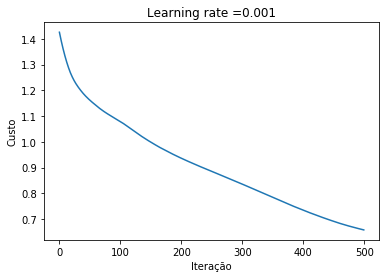

In [49]:
plt.ylabel('Custo')
plt.xlabel('Iteração')
plt.title("Learning rate =" + str(0.001))
plt.plot(report_roth['curves']['mlp1'])

##### **Curva de taxa de erro em iterações da MLP2**

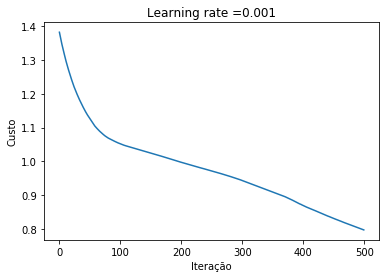

In [50]:
plt.ylabel('Custo')
plt.xlabel('Iteração')
plt.title("Learning rate =" + str(0.001))
plt.plot(report_roth['curves']['mlp2'])

##### **Curva de taxa de erro em iterações K-means**

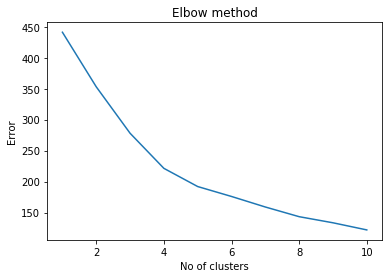

In [51]:
plt.plot(range(1,11), ErrorRothKm)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

## **Wine**
##### **Resultados Algoritmos**

In [52]:
pd.DataFrame.from_dict(report_wine['results'], orient='index')

,0
tree,77.777778
knn5,50.000000
knn10,52.777778
mlp1,52.777778
mlp2,58.333333
kmeans,16.666667


##### **Curva de taxa de erro em iterações da MLP1**

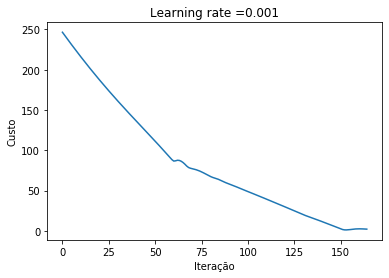

In [53]:
plt.ylabel('Custo')
plt.xlabel('Iteração')
plt.title("Learning rate =" + str(0.001))
plt.plot(report_wine['curves']['mlp1'])

##### **Curva de taxa de erro em iterações da MLP2**

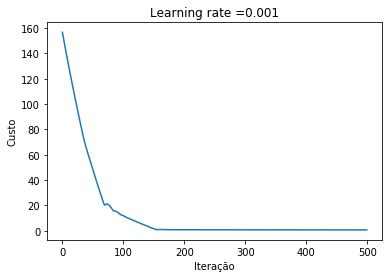

In [54]:
plt.ylabel('Custo')
plt.xlabel('Iteração')
plt.title("Learning rate =" + str(0.001))
plt.plot(report_wine['curves']['mlp2'])

##### **Curva de taxa de erro em iterações K-means**

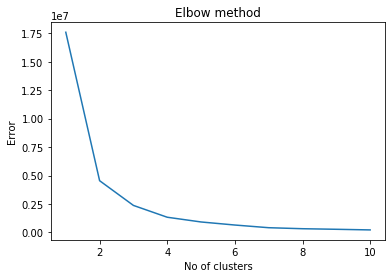

In [55]:
plt.plot(range(1,11), ErrorWineKm)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

## **Iris**
##### **Resultados Algoritmos**

In [56]:
pd.DataFrame.from_dict(report_iris['results'], orient='index')

,0
tree,96.666667
knn5,100.000000
knn10,96.666667
mlp1,100.000000
mlp2,66.666667
kmeans,33.333333


##### **Curva de taxa de erro em iterações da MLP1**

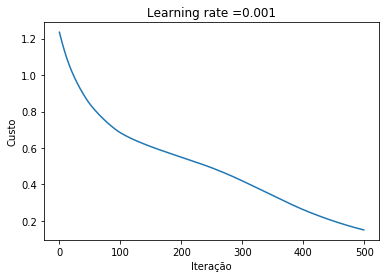

In [57]:
plt.ylabel('Custo')
plt.xlabel('Iteração')
plt.title("Learning rate =" + str(0.001))
plt.plot(report_iris['curves']['mlp1'])

##### **Curva de taxa de erro em iterações da MLP2**

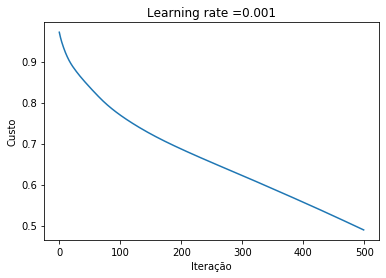

In [58]:
plt.ylabel('Custo')
plt.xlabel('Iteração')
plt.title("Learning rate =" + str(0.001))
plt.plot(report_iris['curves']['mlp2'])

##### **Curva de taxa de erro em iterações K-means**

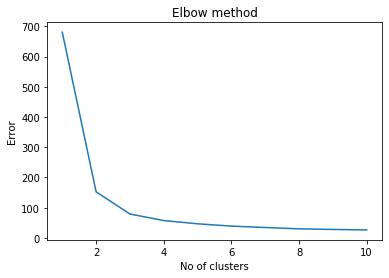

In [59]:
plt.plot(range(1,11), ErrorIrisKm)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()